## Random Froest Classifier

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
df = pd.read_csv("cleaned_legal_metadata.csv")

In [18]:
def extract_case_type(docket):
    docket = str(docket).upper()
    if 'CR' in docket:
        return 'Criminal'
    elif 'CV' in docket or 'CIVIL' in docket:
        return 'Civil'
    elif 'MDL' in docket:
        return 'MDL'
    else:
        return 'Other'

df['case_type'] = df['docket_number'].apply(extract_case_type)


In [7]:
df = df[df['case_type'].isin(['Civil', 'Criminal', 'Other'])]

In [9]:
X_text = df['name'].astype(str)
y = df['case_type']

In [10]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

       Civil       0.75      1.00      0.86        12
    Criminal       1.00      0.25      0.40         4
       Other       1.00      0.50      0.67         2

    accuracy                           0.78        18
   macro avg       0.92      0.58      0.64        18
weighted avg       0.83      0.78      0.73        18



In [24]:
y_pred = rf_model.predict(X_train)
print("Random Forest Classification Report:")
print(classification_report(y_train, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

       Civil       1.00      1.00      1.00        47
    Criminal       1.00      1.00      1.00        12
       Other       1.00      1.00      1.00        11

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



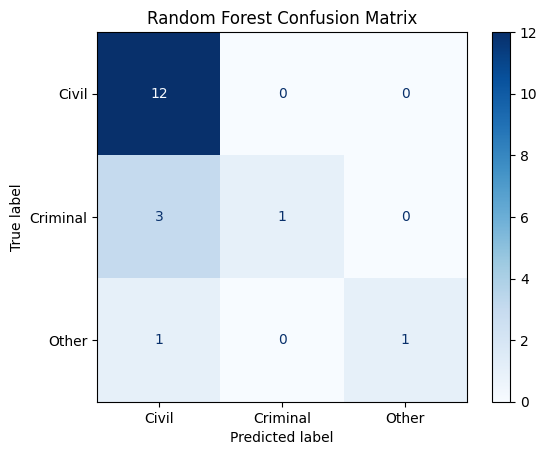

In [77]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test_rf)
cm = confusion_matrix(y_test_rf, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


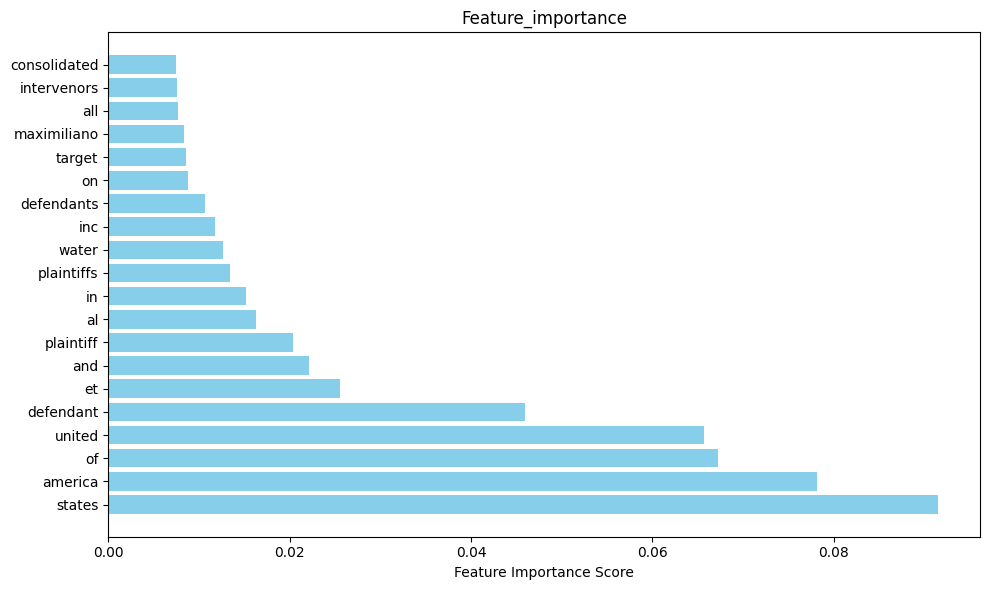

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


feature_names = vectorizer.get_feature_names_out()


importances = rf_model.feature_importances_


indices = np.argsort(importances)[-20:]


plt.figure(figsize=(10, 6))
plt.title("Feature_importance")
plt.barh(range(len(indices)), importances[indices], color="skyblue")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()
plt.savefig("feature_importance_rf.png",dpi=300)


## LSTM (Long Short-Term Memory)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [35]:
max_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text)
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [36]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_cat = to_categorical(y_enc)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
print("Training LSTM...")
model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

Training LSTM...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4630 - loss: 1.0910
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7264 - loss: 1.0193
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6630 - loss: 0.8978
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6917 - loss: 0.7785
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6778 - loss: 0.7472


In [40]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nLSTM Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

       Civil       0.67      1.00      0.80        12
    Criminal       0.00      0.00      0.00         4
       Other       0.00      0.00      0.00         2

    accuracy                           0.67        18
   macro avg       0.22      0.33      0.27        18
weighted avg       0.44      0.67      0.53        18



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [41]:
y_pred = model.predict(X_train).argmax(axis=1)
y_true = y_train.argmax(axis=1)

print("\nLSTM Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

LSTM Classification Report:
              precision    recall  f1-score   support

       Civil       0.69      1.00      0.82        47
    Criminal       0.00      0.00      0.00        12
       Other       1.00      0.18      0.31        11

    accuracy                           0.70        70
   macro avg       0.56      0.39      0.38        70
weighted avg       0.62      0.70      0.60        70



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


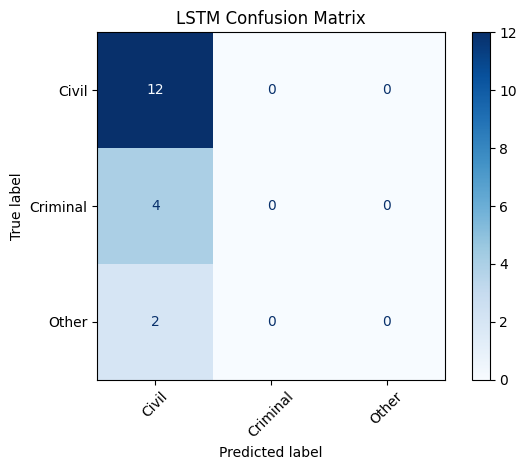

<Figure size 640x480 with 0 Axes>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

y_pred_labels = encoder.inverse_transform(y_pred)
y_true_labels = encoder.inverse_transform(y_true)


cm = confusion_matrix(y_true_labels, y_pred_labels, labels=encoder.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap="Blues")
plt.title("LSTM Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("con_matrix_lstm",dpi=300)

## RNN

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [48]:
max_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text)
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=max_len)

In [49]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_cat = to_categorical(y_enc)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)

In [51]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(SimpleRNN(64))  # <-- SimpleRNN layer
model.add(Dense(3, activation='softmax'))  # 3 output classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
print("Training Simple RNN...")
model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

Training Simple RNN...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4926 - loss: 1.0586
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6578 - loss: 0.8242 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6969 - loss: 0.7059 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8023 - loss: 0.5635 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8408 - loss: 0.4960 


In [53]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nSimple RNN Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

Simple RNN Classification Report:
              precision    recall  f1-score   support

       Civil       0.65      0.92      0.76        12
    Criminal       0.00      0.00      0.00         4
       Other       0.00      0.00      0.00         2

    accuracy                           0.61        18
   macro avg       0.22      0.31      0.25        18
weighted avg       0.43      0.61      0.51        18



c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [54]:
y_pred = model.predict(X_train).argmax(axis=1)
y_true = y_train.argmax(axis=1)

print("\nSimple RNN Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Simple RNN Classification Report:
              precision    recall  f1-score   support

       Civil       0.94      1.00      0.97        47
    Criminal       1.00      0.92      0.96        12
       Other       1.00      0.82      0.90        11

    accuracy                           0.96        70
   macro avg       0.98      0.91      0.94        70
weighted avg       0.96      0.96      0.96        70



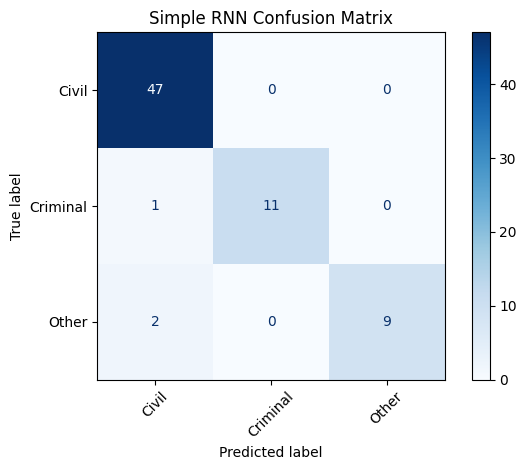

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predicted and true labels back to class names
y_pred_labels = encoder.inverse_transform(y_pred)
y_true_labels = encoder.inverse_transform(y_true)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=encoder.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Simple RNN Confusion Matrix")
plt.tight_layout()
plt.show()
plt.savefig("con_matrix_rnn",dpi=300)

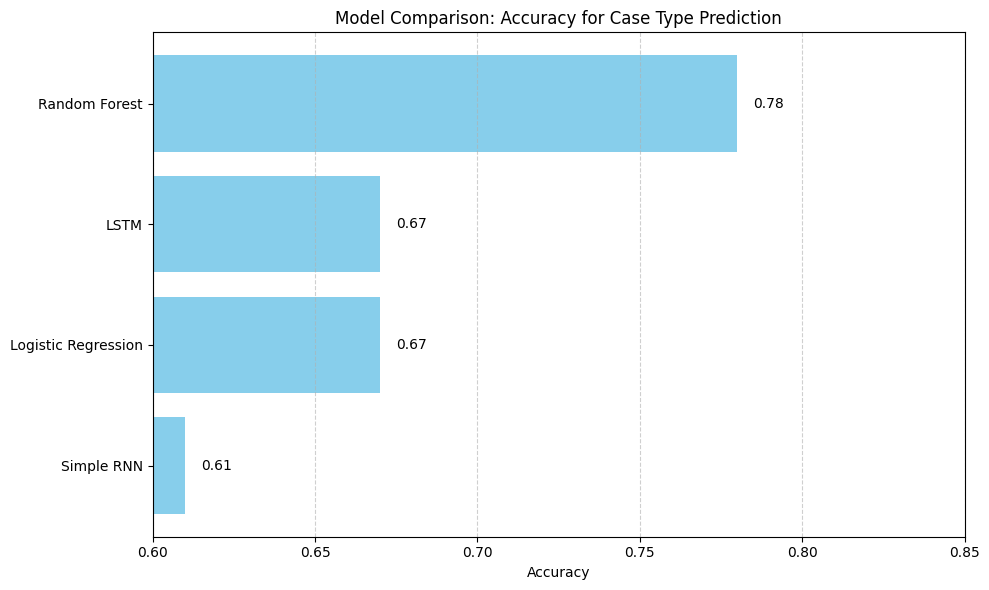

<Figure size 640x480 with 0 Axes>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


results = {
    "Logistic Regression": 0.67,
    "Random Forest": 0.78,
    "Simple RNN": 0.61,
    "LSTM": 0.67
}


df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
df_results.sort_values("Accuracy", ascending=True, inplace=True)


plt.figure(figsize=(10, 6))
bars = plt.barh(df_results["Model"], df_results["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison: Accuracy for Case Type Prediction")
plt.xlim(0.6, 0.85)


for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()
plt.savefig("Accuracy_model",dpi=300)


# Fine Tuning

## Random Forst Classifier

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint





def extract_case_type(docket):
    docket = str(docket).upper()
    if 'CR' in docket:
        return 'Criminal'
    elif 'CV' in docket or 'CIVIL' in docket:
        return 'Civil'
    elif 'MDL' in docket:
        return 'MDL'
    else:
        return 'Other'

df['case_type'] = df['docket_number'].apply(extract_case_type)


df = df[df['case_type'].isin(['Civil', 'Criminal', 'Other'])]


X_text = df['name'].astype(str)
y = df['case_type']


vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 50, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)


rand_search.fit(X_train, y_train)


y_pred = rand_search.predict(X_test)
print("Best Parameters:", rand_search.best_params_)
print("\nFine-Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

y_pred = rand_search.predict(X_train)
print("Best Parameters:", rand_search.best_params_)
print("\nFine-Tuned Random Forest Classification Report:")
print(classification_report(y_train, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 149}

Fine-Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

       Civil       0.79      0.92      0.85        12
    Criminal       1.00      0.25      0.40         4
       Other       0.33      0.50      0.40         2

    accuracy                           0.72        18
   macro avg       0.71      0.56      0.55        18
weighted avg       0.78      0.72      0.70        18

Best Parameters: {'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 149}

Fine-Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

       Civil       0.98      0.98      0.98        47
    Criminal       0.92      0.92      0.92        12
       Other       1.00      1.00      1.00   

## LSTM

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



def extract_case_type(docket):
    docket = str(docket).upper()
    if 'CR' in docket:
        return 'Criminal'
    elif 'CV' in docket or 'CIVIL' in docket:
        return 'Civil'
    elif 'MDL' in docket:
        return 'MDL'
    else:
        return 'Other'

df['case_type'] = df['docket_number'].apply(extract_case_type)
df = df[df['case_type'].isin(['Civil', 'Criminal', 'Other'])]


X_text = df['name'].astype(str)
y = df['case_type']

max_words = 6000
max_len = 60

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text)
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=max_len)


encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_cat = to_categorical(y_enc)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Training fine-tuned LSTM...")
model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nFine-Tuned LSTM Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))

y_pred = model.predict(X_train).argmax(axis=1)
y_true = y_train.argmax(axis=1)

print("\nFine-Tuned LSTM Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))


Training fine-tuned LSTM...
Epoch 1/15


c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 720ms/step - accuracy: 0.4740 - loss: 1.0927 - val_accuracy: 0.5714 - val_loss: 1.0868
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7050 - loss: 1.0666 - val_accuracy: 0.5714 - val_loss: 1.0586
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6425 - loss: 1.0251 - val_accuracy: 0.5714 - val_loss: 1.0093
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6946 - loss: 0.9614 - val_accuracy: 0.5714 - val_loss: 0.9411
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6842 - loss: 0.9080 - val_accuracy: 0.5714 - val_loss: 1.0590
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6738 - loss: 0.8635 - val_accuracy: 0.5714 - val_loss: 0.9780
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6634 - loss: 0.8173 - val_accuracy: 0.5714 - val_loss: 0.9237
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6738 - loss: 0.7665 - val_accuracy: 0.5714 - val_loss: 0.9119
Epoch 9

c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

Fine-Tuned LSTM Classification Report:
              precision    recall  f1-score   support

       Civil       0.80      1.00      0.89        47
    Criminal       1.00      0.83      0.91        12
       Other       1.00      0.09      0.17        11

    accuracy                           0.83        70
   macro avg       0.93      0.64      0.65        70
weighted avg       0.86      0.83      0.78        70



## RNN

In [67]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  
model.add(SimpleRNN(128))  
model.add(Dropout(0.5))    
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Training fine-tuned SimpleRNN model...")
model.fit(
    X_train, y_train,
    epochs=20,               
    batch_size=32,           
    validation_split=0.1,    
    callbacks=[early_stop],  
    verbose=1
)


y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nFine-tuned SimpleRNN Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))

y_pred = model.predict(X_train).argmax(axis=1)
y_true = y_train.argmax(axis=1)

print("\nFine-tuned SimpleRNN Classification Report:")
print(classification_report(encoder.inverse_transform(y_true), encoder.inverse_transform(y_pred)))

Training fine-tuned SimpleRNN model...
Epoch 1/20


c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.4740 - loss: 1.0431 - val_accuracy: 0.5714 - val_loss: 0.9307
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6842 - loss: 0.7876 - val_accuracy: 0.5714 - val_loss: 0.9174
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7369 - loss: 0.6890 - val_accuracy: 0.5714 - val_loss: 0.8899
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7688 - loss: 0.6267 - val_accuracy: 0.5714 - val_loss: 0.8862
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8214 - loss: 0.4770 - val_accuracy: 0.5714 - val_loss: 0.7869
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9158 - loss: 0.3658 - val_accuracy: 0.5714 - val_loss: 0.8397
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9264 - loss: 0.3308 - val_accuracy: 0.5714 - val_loss: 0.8542
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9788 - loss: 0.2116 - val_accuracy: 0.5714 - val_loss: 0.8488
1/1 ━━━━━━

c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\manas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

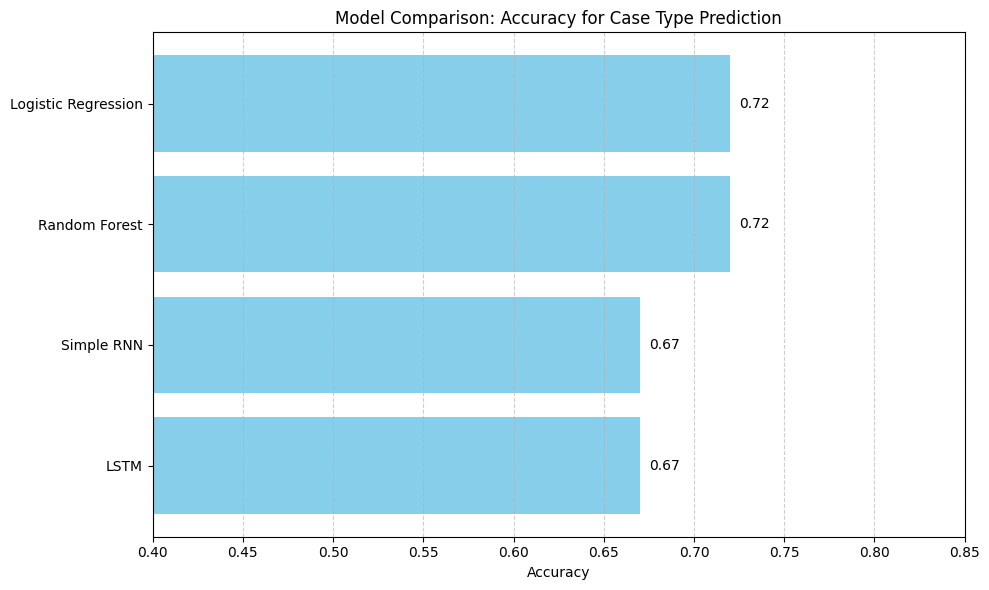

<Figure size 640x480 with 0 Axes>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


results = {
    "Logistic Regression": 0.72,
    "Random Forest": 0.72,
    "Simple RNN": 0.67,
    "LSTM": 0.67
}


df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
df_results.sort_values("Accuracy", ascending=True, inplace=True)


plt.figure(figsize=(10, 6))
bars = plt.barh(df_results["Model"], df_results["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison: Accuracy for Case Type Prediction")
plt.xlim(0.4, 0.85)


for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()
plt.savefig("Accuracy_model_after_tuning", dpi=300)
